# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |


In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
* Car idled at a green light with no oncoming traffic
* The rewards are either negative or positive ranging from 1.1-5.5
* The color of the light only has an affect on the reward if the action taken or not taken by the agent is correct or not. If the light is <font color='green'>green</font> and the car idles wrongly, the reward is a high negative. If the light is <font color='red'>red</font>, and the car idles correctly, the reward is a positive one. 

--------------------------------------------------------------------------------------------------------------------------------

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
* **Agent.py**:
    * Alpha: this is the learning factor, depending on the reward function, the learning rate might change overtime (Stochastic).
    * Epislon: a random factor that will affect how the agent makes decisions. The decision will be random or not is determined.
    * Update Delay: the time between making actions.
* **Environment.py**: 
    * the <font color='green'>act</font> function is called when performing actions.
* **Simulator.py**: 
    * render_text(): produces the output of the simulation in text format, in the command prompt.
    * render(): produces the output of the simulation using a GUI.
* **Planner.py**:
    * next_waypoint(): considers East-West direction first

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.



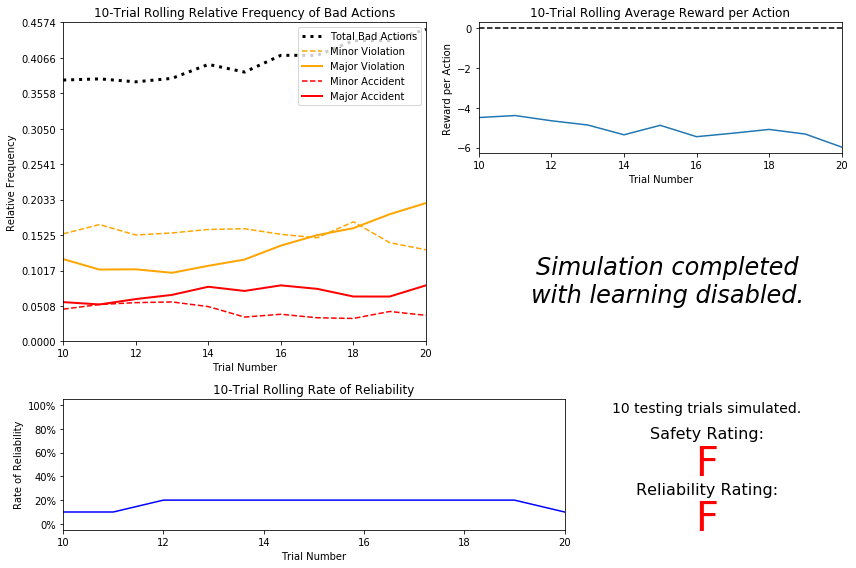

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

### **Answer:**
* The agent is making bad decisions between 38-45% of the time. Accidents, both minor and major, were caused in nearly 5% of those decisions.
* Yes, a random agent would make decisions with the same rate as chance (ie. 40-50%).
* The average reward for the 10-trials is around a **-5.5**, indicating that the agent is being heavily penalized.
* The only change that is noteable is a slight decrease in 'Total Bad Actions', from 47% down to 40%.
* **Absolutely Not** safe or reliable. Violations and or accidents occured nearly 50% of the time, resulting in an F in both categories.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

**Safety**: Requires inputs such as the state of the stop lights, and if there is any oncoming traffic. Knowning these will allow the agent to avoid violations and accidents. Another input is knowing if there is traffic coming from the left, which may not always be important, but it is critical to safety when considering turning right on a red light.

**Efficiency**: Requires waypoint and deadline. Waypoint tells the agent what direction it should be travelling, while deadline gives the agent the time remaining to get to the final destination. Knowing what direction to travel, and time remaining will allow for the agent to get to the destination in the quickest time possible.

Overall, there are only a few features that aren't that important. 'Right' input, and ideally 'deadline'. If we consider that the agent is driving in the US, the 'Right' direction will not matter to the driver. If this was in the UK lets say, then the 'Left' direction would not matter. And ideally, the cab would want to get to the final destination as quickly as possible without knowing the deadline, so this might be unnecessary. Another possible issue with including the deadline might be that the agent would take dangerous actions resulting in negative rewards and Q-scores inorder to get to the endpoint before time expires. 

--------------------------------------------------------------------------------------------------------------------------------

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Way point has 3 states: "Right, Forward, Left". 
Oncoming has 4 states: "None, Right, Forward, Left".
Light has 2 states: "Green, Red".
Left has 4 states: "None, Right, Forwared, Left".

(4*2)*3*2 = 96 states

This is not a very large number of states, therefore the agent should not have any problem learning.

--------------------------------------------------------------------------------------------------------------------------------

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

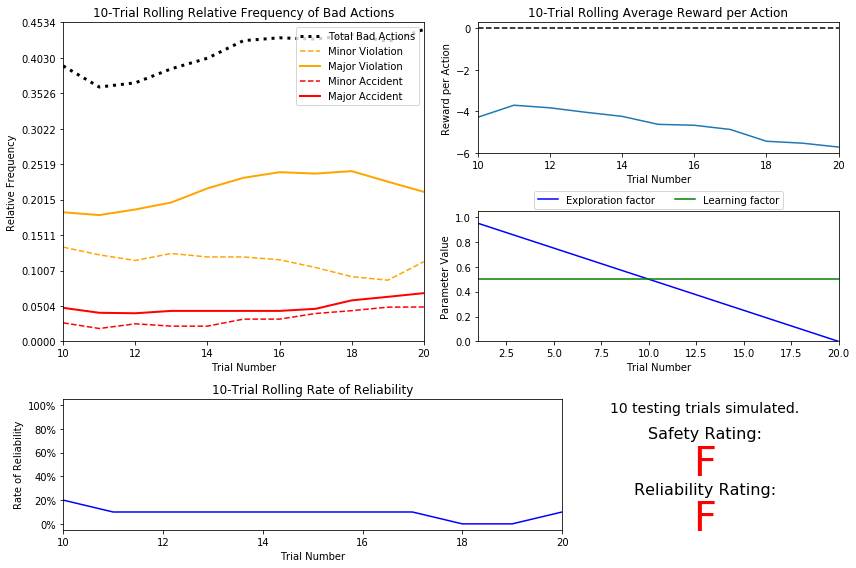

In [9]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
* They both failed in safety and reliability. The overall number of violations and accidents actually increased a little as trials increased.
* It took 10 trials prior to testing, as can be seen in the exploration and learning graph.
* The decay factor set for epsilon can be seen in the exploration factor graph. As the trials increase, the value decreases towards 0 at a constant rate.
* The violations and accidents both decreased a little as the trials increased, conversely, the average reward decreased as the trials increased.
* It fails both safety and reliability both.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

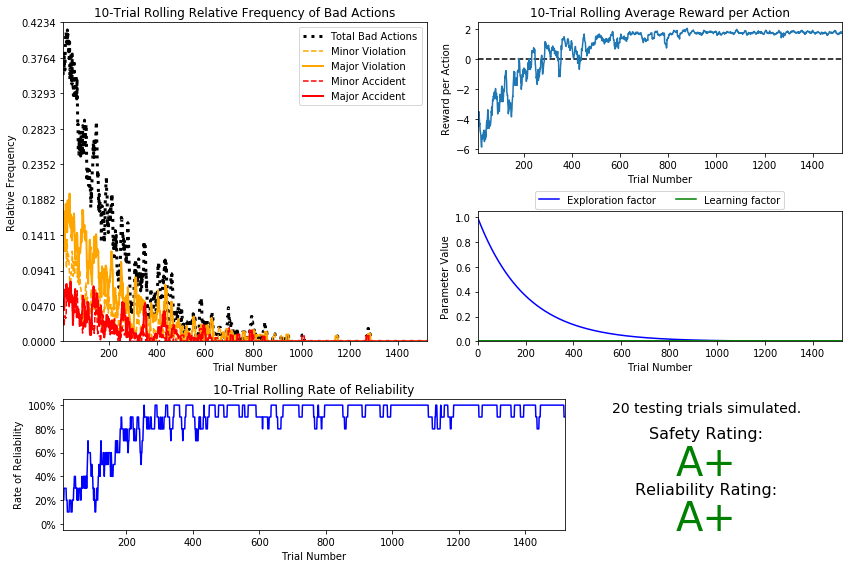

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
* Epsilon Decay Function:$$\epsilon = e^{-at}, \textrm{for } 0 < a < 1$$
* The model used approximately 1500 trials prior to testing.
* I used an epsilon of **0.8**, an epsilon tolerance of **0.0005**, and an alpha value of **0.005**. After making a multitude of changes, I settled on having a very low alpha value in order to allow the model to learn, but at a very slow rate. This way more information in the Q-values can be obtained prior to testing. The epsilon tolerence is set low, this is done so that the model can run more trials and gather more data prior to testing. As I lowered the tolerance from 0.05 to 0.005, and finally 0.0005, the number of trials ran increased from 500 to 1000 to 1500.
* There was a massive improvement in both safety and reliability. Both increased from an F-rating to an A+ rating. Average rewards improved approximately +4 points. 
* Yes, it appears that the model learned a highly effective and appropriate policy. The bad actions reduced from 42% to nearly 0% by the 1000th trial, as well as the reward increasing to a positive average by the 300th trial. The reliability is not perfect, but it is very close and only reduces from 100% to around 90%.
* Yes I am, I ran the model 5 times, the safety outcome was always an A+ rating, and the reliability rating fluctuated between an A and A+ rating as well. This is more than adequate since the safety is most important, and the reliability of getting to the destination is high enough that any failure to do so will be a minor amount.

--------------------------------------------------------------------------------------------------------------------------------

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
1. _Optimal Policy_: If the light is green, go in the direction of the waypoint, unless there is oncoming traffic and the agent needs to turn left. In this case, wait until the oncoming traffic has turned or coninued forward/passed the agent before turning left. If the waypoint is behind the agent, the agent should turn left or right as soon as possible (while abiding by other optimal policies). If the light is red and the agent is continuing forward or turning left, idle at light untill green. If the light is red and the agent is turning right, as long as there are no oncoming cars from the left, the agent should turn right. 
2. _Optimal Policy - (waypoint, light, left, oncoming)_:
    * ('right', 'green', 'forward', 'right')--forward: 0.00--None: -0.03--right: 0.17--left: 0.00
    
    The waypoint is to the right and the light is green, with oncoming traffic going right, the highest reward should be to turn right, which is correct.
    * ('right', 'red', None, None)--forward: -3.20--None: 0.15--right: 1.73--left: -1.92
    
    The waypoint is right and the light is red, there is no oncoming traffic or traffic from the left. Therefore the best action would be to turn right which as the highest reward.
    * ('forward', 'red', 'left', None)--forward: -0.81--None: 1.51--right: 0.06--left: -0.39
    
    The waypoint is forward and the light is red, therefore the best action and highest reward should be to do nothing and idle.
    * ('right', 'green', 'right', 'forward')--forward: 0.00--None: -0.02--right: 0.10--left: 0.00
    
    The waypoint is right and the light is green, oncoming traffic is not important so the best action is to turn right.
    * ('forward', 'green', 'right', 'left')--forward: 0.01--None: -0.03--right: 0.02--left: 0.31
    
    This is a surprising policy, and absolutely a sub-optimal policy. The way point is forward and the light is green, leftward traffic does not matter and oncoming traffic is turning left. I would have thought that forward is still the best option since traffic turning left must yeild to oncoming traffic. However, this shows that turning either left or right are better options, left by much more than I thought.
    
    * ('left', 'green', 'forward', 'left')--forward: 0.34--None: -0.07--right: 0.01--left: 0.01
    
    The waypoint is left and the light is green, oncoming traffic is turning left, so the best reward direction should be to turn left since oncoming traffic does not interfer with the agent, however the highest reward is given to the 'forward' direction. This is incorrect, the 'left' action should have the greatest reward.
    * ('left', 'green', None, 'forward')--forward: 0.73--None: -0.54--right: 0.05--left: -2.52
    
    
    This is another surprising policy. The waypoint is left and the light is green, oncoming traffic is moving forward which inhibits our ability to turn left since that would cause an accident most likely. I would expect the highest reward to then be forward followed by doing nothing/idling. However, this gives us a positive reward for turning right which takes us farther away from the endpoint. 
3. Above are good examples of the smart cab learning optimal policies. 
4. There are some examples of where the cab failed to do so. These are far less likely than when the cab learned appropriatly. A possible source of the model learning sub-optimal policies might be the 'choose_action' function, and rather than choosing the action with with greatest Q-value, the state chooses a random action instead. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The 2 issues with gamma for our project are seperate but connected between the environment and smartcab agent. What I mean is that our cab is conducting each state-action-reward at a local level, so every reward is simply based off of the current state and no other. Once the cab moves to a new state, the new rewards are entirely dependant on that new state and no other. Therefore, any future reward associated with arriving at the endpoint would not matter to the action made at each state. This is also the issue with the environment, since the environment is changing at each state, a future reward would be essentially meaningless.

--------------------------------------------------------------------------------------------------------------------------------